# Cataluña

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('catalunya_diari.csv', delimiter=';', parse_dates=['DATA'], usecols=['DATA', 'CASOS_CONFIRMAT'])
cat = df.groupby(['DATA']).sum().cumsum()

In [3]:
cases = cat['CASOS_CONFIRMAT'].to_numpy()
days = np.asarray([i for i in range(len(cases))]).reshape(-1, 1)
future_forcast = np.asarray([i for i in range(len(cases) + 50)]).reshape(-1, 1)

In [4]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days, cases, test_size=0.05, shuffle=False) 
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 49994.62423338119
MSE: 2503325911.5624804


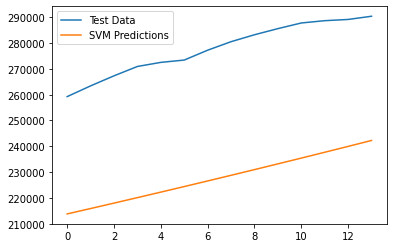

In [5]:
# check against testing data
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

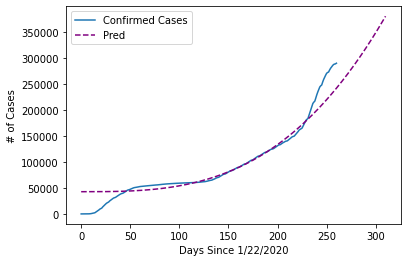

In [6]:
#plt.figure(figsize=(16, 10))
plt.plot(days, cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
#plt.title('Worldwide Coronavirus Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.legend(['Confirmed Cases', 'Pred'])
plt.xticks()
plt.yticks()
plt.show()

# Andalucía

In [7]:
df = pd.read_csv('andalucia_diari.csv', delimiter=';', parse_dates=['Fecha diagnóstico'], usecols=['Fecha diagnóstico', 'Territorio', 'Medida', 'Valor'])

In [8]:
filt_df = df.loc[(df['Territorio'] == 'Andalucía') & (df['Medida'] == 'Total confirmados')]

In [9]:
an = filt_df.sort_values(by='Fecha diagnóstico').drop(columns=['Medida', 'Territorio']).set_index('Fecha diagnóstico').cumsum()

In [10]:
cases = an['Valor'].to_numpy()
days = np.asarray([i for i in range(len(cases))]).reshape(-1, 1)
future_forcast = np.asarray([i for i in range(len(cases) + 50)]).reshape(-1, 1)

In [11]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days, cases, test_size=0.05, shuffle=False) 
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

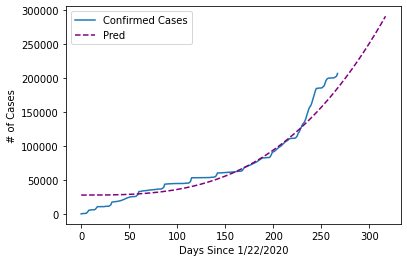

In [12]:
#plt.figure(figsize=(16, 10))
plt.plot(days, cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
#plt.title('Worldwide Coronavirus Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.legend(['Confirmed Cases', 'Pred'])
plt.xticks()
plt.yticks()
plt.show()

# Aragón

In [13]:
ar = pd.read_csv('casos_coronavirus_aragon.csv', delimiter=',', usecols=['casos_confirmados', 'fecha'], parse_dates=['fecha'])

In [14]:
ar.set_index('fecha')

,casos_confirmados
fecha,
2020-03-04,1
2020-03-06,9
2020-03-07,14
2020-03-08,21
2020-03-09,32
...,...
2020-11-10,65485
2020-11-11,66323
2020-11-12,67053


In [15]:
cases = ar['casos_confirmados'].to_numpy()
days = np.asarray([i for i in range(len(cases))]).reshape(-1, 1)
future_forcast = np.asarray([i for i in range(len(cases) + 50)]).reshape(-1, 1)

In [16]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days, cases, test_size=0.05, shuffle=False) 
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

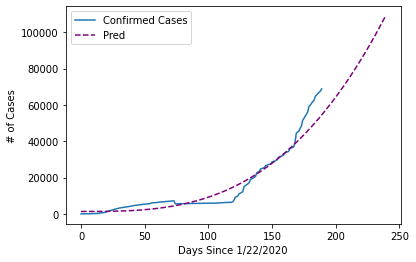

In [17]:
#plt.figure(figsize=(16, 10))
plt.plot(days, cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
#plt.title('Worldwide Coronavirus Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.legend(['Confirmed Cases', 'Pred'])
plt.xticks()
plt.yticks()
plt.show()

# Comunitat Valenciana

# País Vasco

In [18]:
eusk = pd.read_csv('casos_coronavius_euskadi.csv', delimiter=';', usecols=['Data / Fecha', 'Kasu positiboak guztira / Casos positivos totales'], parse_dates=['Data / Fecha'], encoding='iso-8859-1', skiprows=1).fillna(0).set_index('Data / Fecha')

In [19]:
list(eusk)

['Kasu positiboak guztira / Casos positivos totales']

In [20]:
eusk.head()

,Kasu positiboak guztira / Casos positivos totales
Data / Fecha,
2020-02-24,0.0
2020-02-25,0.0
2020-02-26,0.0
2020-02-27,0.0
2020-02-28,0.0


In [21]:
cases = eusk['Kasu positiboak guztira / Casos positivos totales'].to_numpy()
days = np.asarray([i for i in range(len(cases))]).reshape(-1, 1)
future_forcast = np.asarray([i for i in range(len(cases) + 50)]).reshape(-1, 1)

In [22]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days, cases, test_size=0.05, shuffle=False) 
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

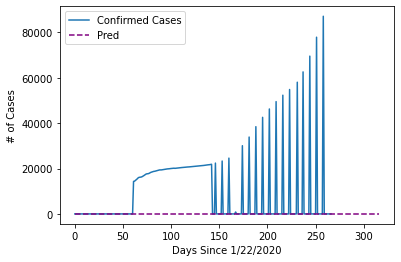

In [23]:
#plt.figure(figsize=(16, 10))
plt.plot(days, cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
#plt.title('Worldwide Coronavirus Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.legend(['Confirmed Cases', 'Pred'])
plt.xticks()
plt.yticks()
plt.show()

# Madrid

In [24]:
mad = pd.read_csv('diario_madrid.csv', delimiter=';', usecols=['fecha_informe', 'casos_confirmados_totales'], parse_dates=['fecha_informe'], encoding='iso-8859-1')

In [32]:
mad.set_index('fecha_informe').sort_values(by='fecha_informe')

,casos_confirmados_totales
fecha_informe,
2020-02-26 07:00:00,NaN
2020-02-26 07:00:00,NaN
2020-02-26 07:00:00,NaN
2020-02-26 07:00:00,NaN
2020-02-26 07:00:00,NaN
...,...
2020-07-01 09:00:00,278.0
2020-07-01 09:00:00,303.0
2020-07-01 09:00:00,84.0
